# 🚀 Instalación de Dependencias

In [22]:
import subprocess
import sys

required_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn']

for package in required_packages:
    try:
        __import__(package)
        print(f'{package} ya está instalado')
    except ImportError:
        print(f'Instalando {package}...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
        print(f'{package} instalado correctamente')

print('Todas las dependencias están listas!')

pandas ya está instalado
numpy ya está instalado
matplotlib ya está instalado
seaborn ya está instalado
Instalando scikit-learn...
scikit-learn instalado correctamente
Todas las dependencias están listas!


#📌 Extracción

Datos cargados: 7267 registros
Estructura del primer registro:
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}


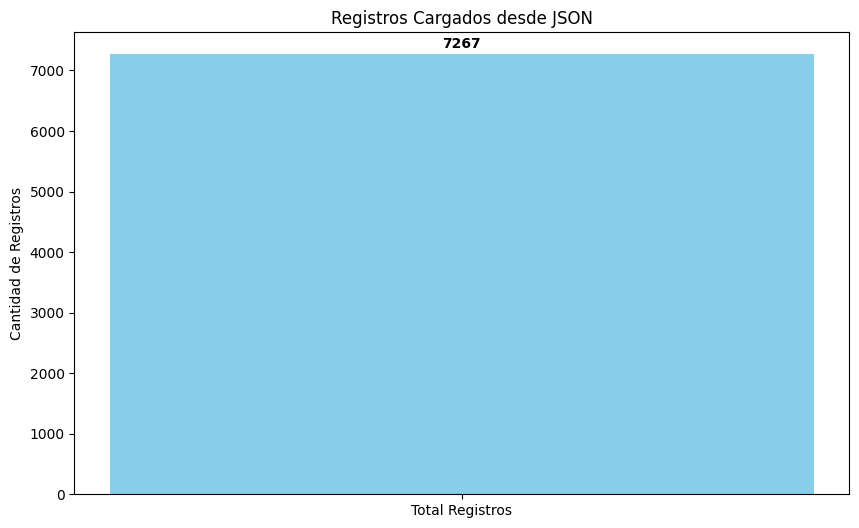

In [23]:
import json
import pandas as telecom_dataframe_library
import numpy as numerical_operations_library
import matplotlib.pyplot as visualization_plotting_library
import seaborn as statistical_visualization_library
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

visualization_plotting_library.style.use('default')
statistical_visualization_library.set_palette('husl')

with open('TelecomX_Data.json', 'r') as telecom_data_file:
    raw_customer_data = json.load(telecom_data_file)

total_customer_records = len(raw_customer_data)
first_customer_record = raw_customer_data[0]

print(f'Datos cargados: {total_customer_records} registros')
print('Estructura del primer registro:')
print(json.dumps(first_customer_record, indent=2))

visualization_plotting_library.figure(figsize=(10, 6))
visualization_plotting_library.bar(['Total Registros'], [total_customer_records], color='skyblue')
visualization_plotting_library.title('Registros Cargados desde JSON')
visualization_plotting_library.ylabel('Cantidad de Registros')
for i, v in enumerate([total_customer_records]):
    visualization_plotting_library.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
visualization_plotting_library.show()

#🔧 Transformación

DataFrame creado con 7267 filas y 21 columnas

Primeras 5 filas:


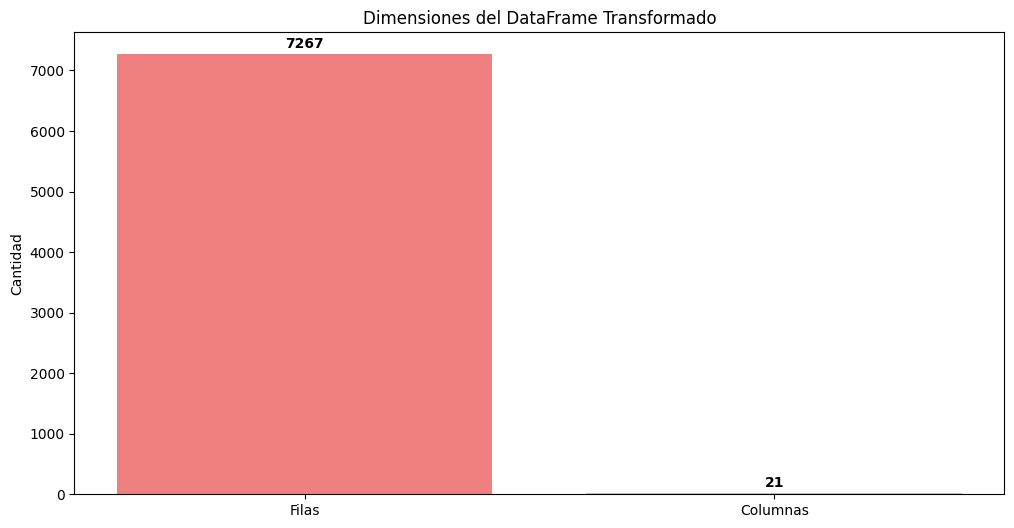

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [24]:
def transform_nested_json_to_flat_structure(single_customer_record):
    flattened_customer_data = {}
    
    flattened_customer_data['customerID'] = single_customer_record['customerID']
    flattened_customer_data['Churn'] = single_customer_record['Churn']
    
    customer_demographic_info = single_customer_record['customer']
    for demographic_key, demographic_value in customer_demographic_info.items():
        flattened_customer_data[demographic_key] = demographic_value
    
    phone_service_info = single_customer_record['phone']
    for phone_key, phone_value in phone_service_info.items():
        flattened_customer_data[phone_key] = phone_value
    
    internet_service_info = single_customer_record['internet']
    for internet_key, internet_value in internet_service_info.items():
        flattened_customer_data[internet_key] = internet_value
    
    account_billing_info = single_customer_record['account']
    flattened_customer_data['Contract'] = account_billing_info['Contract']
    flattened_customer_data['PaperlessBilling'] = account_billing_info['PaperlessBilling']
    flattened_customer_data['PaymentMethod'] = account_billing_info['PaymentMethod']
    
    customer_charges_info = account_billing_info['Charges']
    flattened_customer_data['MonthlyCharges'] = customer_charges_info['Monthly']
    flattened_customer_data['TotalCharges'] = customer_charges_info['Total']
    
    return flattened_customer_data

all_flattened_customer_records = [transform_nested_json_to_flat_structure(customer_record) for customer_record in raw_customer_data]

telecom_customers_dataframe = telecom_dataframe_library.DataFrame(all_flattened_customer_records)

dataframe_total_rows = telecom_customers_dataframe.shape[0]
dataframe_total_columns = telecom_customers_dataframe.shape[1]

print(f'DataFrame creado con {dataframe_total_rows} filas y {dataframe_total_columns} columnas')
print('\nPrimeras 5 filas:')

visualization_plotting_library.figure(figsize=(12, 6))
visualization_plotting_library.bar(['Filas', 'Columnas'], [dataframe_total_rows, dataframe_total_columns], color=['lightcoral', 'lightgreen'])
visualization_plotting_library.title('Dimensiones del DataFrame Transformado')
visualization_plotting_library.ylabel('Cantidad')
for i, v in enumerate([dataframe_total_rows, dataframe_total_columns]):
    visualization_plotting_library.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
visualization_plotting_library.show()

telecom_customers_dataframe.head()

#📊 Carga y análisis

=== ESTADÍSTICAS DESCRIPTIVAS ===
            tenure  MonthlyCharges  TotalCharges  AdditionalServices  \
count  7043.000000     7043.000000   7032.000000         7043.000000   
mean     32.371149       64.761692   2283.300441            2.037910   
std      24.559481       30.090047   2266.771362            1.847682   
min       0.000000       18.250000     18.800000            0.000000   
25%       9.000000       35.500000    401.450000            0.000000   
50%      29.000000       70.350000   1397.475000            2.000000   
75%      55.000000       89.850000   3794.737500            3.000000   
max      72.000000      118.750000   8684.800000            6.000000   

       DailyCharges  
count   7043.000000  
mean       2.158723  
std        1.003002  
min        0.608333  
25%        1.183333  
50%        2.345000  
75%        2.995000  
max        3.958333  


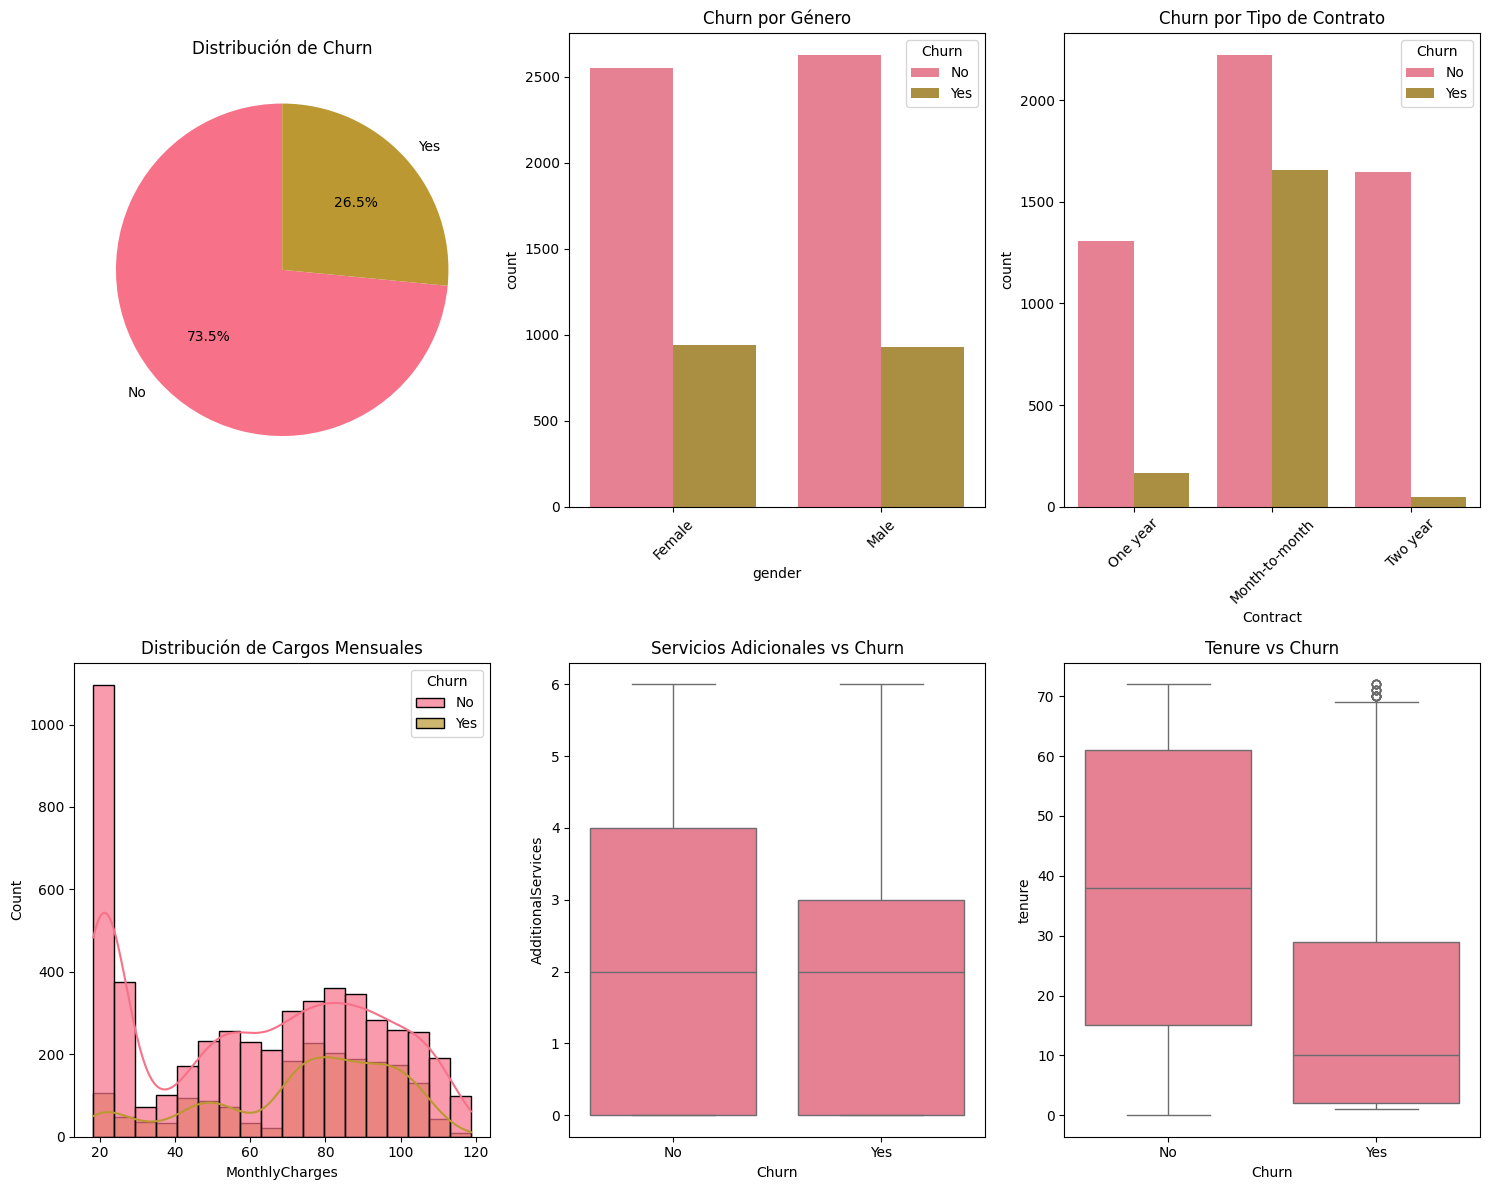

In [37]:
print('=== ESTADÍSTICAS DESCRIPTIVAS ===')
descriptive_statistics = telecom_customers_dataframe.describe()
print(descriptive_statistics)

visualization_plotting_library.figure(figsize=(15, 12))

visualization_plotting_library.subplot(2, 3, 1)
churn_value_counts = telecom_customers_dataframe['Churn'].value_counts()
visualization_plotting_library.pie(churn_value_counts.values, labels=churn_value_counts.index, autopct='%1.1f%%', startangle=90)
visualization_plotting_library.title('Distribución de Churn')

visualization_plotting_library.subplot(2, 3, 2)
statistical_visualization_library.countplot(data=telecom_customers_dataframe, x='gender', hue='Churn')
visualization_plotting_library.title('Churn por Género')
visualization_plotting_library.xticks(rotation=45)

visualization_plotting_library.subplot(2, 3, 3)
statistical_visualization_library.countplot(data=telecom_customers_dataframe, x='Contract', hue='Churn')
visualization_plotting_library.title('Churn por Tipo de Contrato')
visualization_plotting_library.xticks(rotation=45)

visualization_plotting_library.subplot(2, 3, 4)
statistical_visualization_library.histplot(data=telecom_customers_dataframe, x='MonthlyCharges', hue='Churn', kde=True, alpha=0.7)
visualization_plotting_library.title('Distribución de Cargos Mensuales')

visualization_plotting_library.subplot(2, 3, 5)
statistical_visualization_library.boxplot(data=telecom_customers_dataframe, x='Churn', y='AdditionalServices')
visualization_plotting_library.title('Servicios Adicionales vs Churn')

visualization_plotting_library.subplot(2, 3, 6)
statistical_visualization_library.boxplot(data=telecom_customers_dataframe, x='Churn', y='tenure')
visualization_plotting_library.title('Tenure vs Churn')

visualization_plotting_library.tight_layout()
visualization_plotting_library.show()

=== ANÁLISIS DE CORRELACIÓN ===


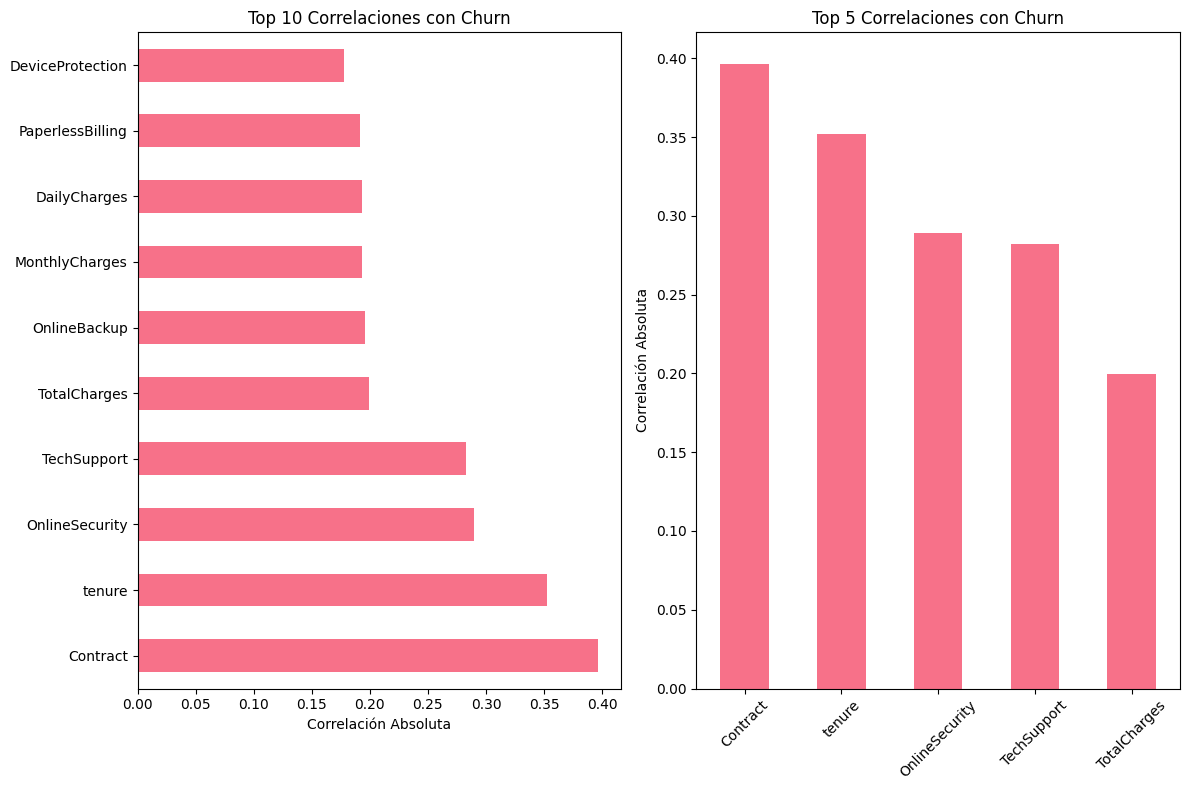


Top 10 variables más correlacionadas con Churn:
Contract: 0.397
tenure: 0.352
OnlineSecurity: 0.289
TechSupport: 0.282
TotalCharges: 0.199
OnlineBackup: 0.196
MonthlyCharges: 0.193
DailyCharges: 0.193
PaperlessBilling: 0.192
DeviceProtection: 0.178


In [36]:
print('=== ANÁLISIS DE CORRELACIÓN ===')

correlation_analysis_dataframe = telecom_customers_dataframe.select_dtypes(include=[numerical_operations_library.number]).copy()

categorical_variable_encoder = LabelEncoder()
categorical_columns_for_encoding = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
                                   'MultipleLines', 'InternetService', 'OnlineSecurity',
                                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                   'StreamingTV', 'StreamingMovies', 'Contract',
                                   'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

for categorical_column_name in categorical_columns_for_encoding:
    if categorical_column_name in telecom_customers_dataframe.columns:
        encoded_categorical_values = categorical_variable_encoder.fit_transform(telecom_customers_dataframe[categorical_column_name].astype(str))
        correlation_analysis_dataframe[categorical_column_name] = encoded_categorical_values

customer_correlation_matrix = correlation_analysis_dataframe.corr()

visualization_plotting_library.figure(figsize=(12, 8))

churn_correlation_values = customer_correlation_matrix['Churn'].abs().sort_values(ascending=False)
top_churn_correlations = churn_correlation_values[1:11]

visualization_plotting_library.subplot(1, 2, 1)
top_churn_correlations.plot(kind='barh')
visualization_plotting_library.title('Top 10 Correlaciones con Churn')
visualization_plotting_library.xlabel('Correlación Absoluta')

visualization_plotting_library.subplot(1, 2, 2)
churn_correlations_for_display = churn_correlation_values[1:6]
churn_correlations_for_display.plot(kind='bar')
visualization_plotting_library.title('Top 5 Correlaciones con Churn')
visualization_plotting_library.xticks(rotation=45)
visualization_plotting_library.ylabel('Correlación Absoluta')

visualization_plotting_library.tight_layout()
visualization_plotting_library.show()

print('\nTop 10 variables más correlacionadas con Churn:')
for correlation_variable_name, correlation_value in top_churn_correlations.items():
    print(f'{correlation_variable_name}: {correlation_value:.3f}')

=== ANÁLISIS DETALLADO DE FACTORES DE CHURN ===


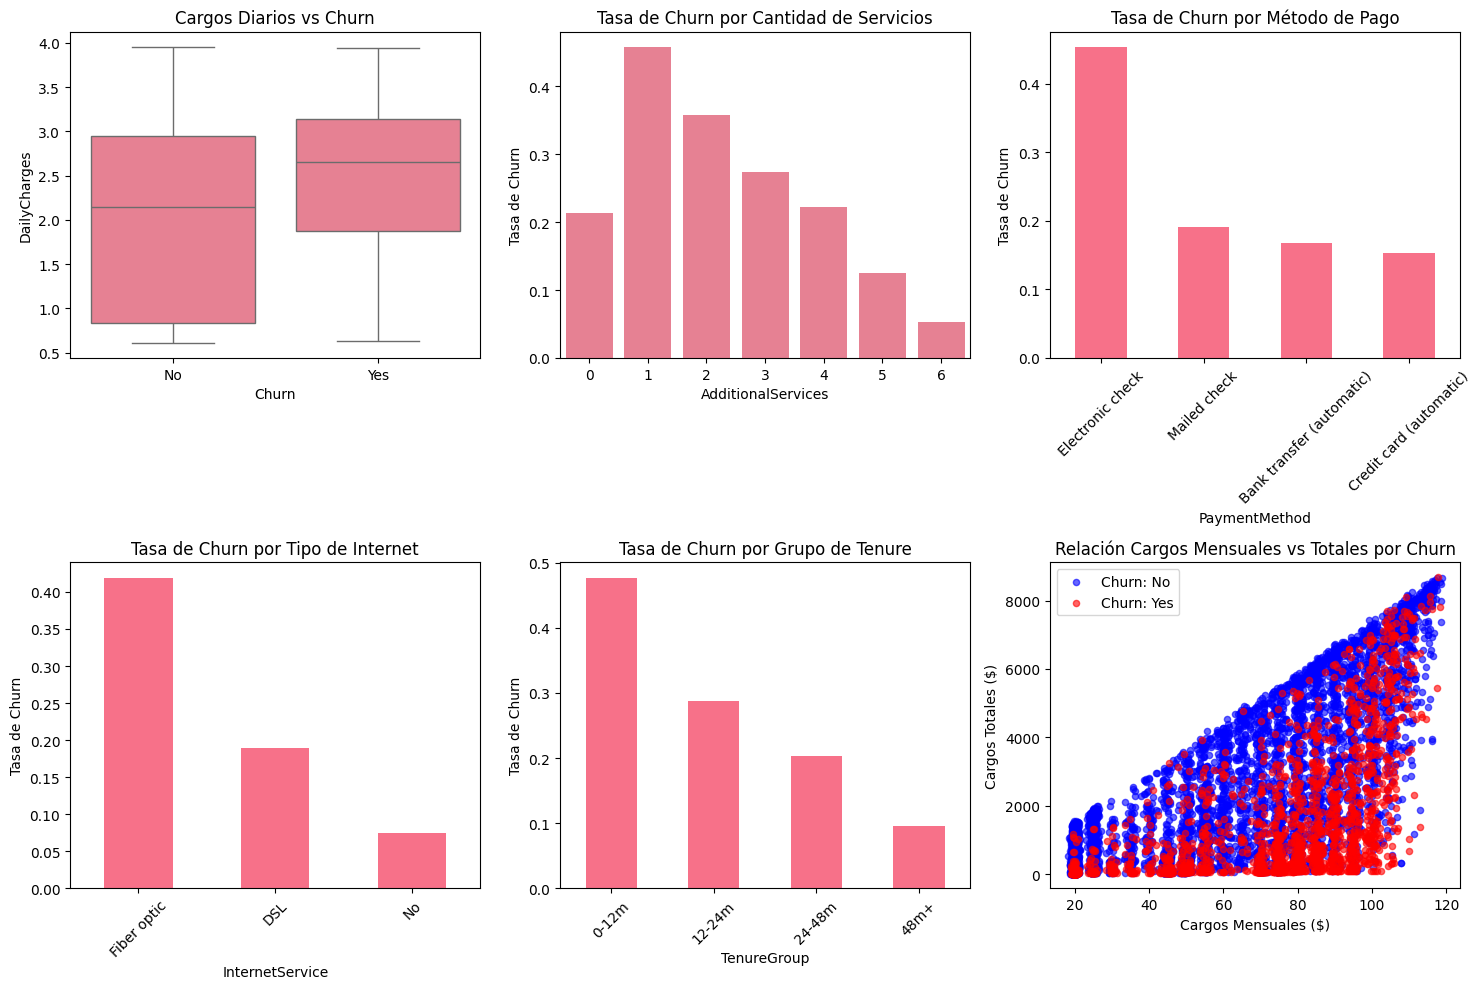

In [34]:
print('=== ANÁLISIS DETALLADO DE FACTORES DE CHURN ===')

telecom_customers_dataframe['DailyCharges'] = telecom_customers_dataframe['MonthlyCharges'] / 30

visualization_plotting_library.figure(figsize=(15, 10))

visualization_plotting_library.subplot(2, 3, 1)
statistical_visualization_library.boxplot(data=telecom_customers_dataframe, x='Churn', y='DailyCharges')
visualization_plotting_library.title('Cargos Diarios vs Churn')

visualization_plotting_library.subplot(2, 3, 2)
churn_rate_by_additional_services = telecom_customers_dataframe.groupby('AdditionalServices')['Churn'].apply(
    lambda churn_group: (churn_group == 'Yes').mean()
).reset_index()
churn_rate_by_additional_services.columns = ['AdditionalServices', 'ChurnRate']
statistical_visualization_library.barplot(data=churn_rate_by_additional_services, x='AdditionalServices', y='ChurnRate')
visualization_plotting_library.title('Tasa de Churn por Cantidad de Servicios')
visualization_plotting_library.ylabel('Tasa de Churn')

visualization_plotting_library.subplot(2, 3, 3)
churn_rate_by_payment_method = telecom_customers_dataframe.groupby('PaymentMethod')['Churn'].apply(
    lambda payment_churn_group: (payment_churn_group == 'Yes').mean()
).sort_values(ascending=False)
churn_rate_by_payment_method.plot(kind='bar')
visualization_plotting_library.title('Tasa de Churn por Método de Pago')
visualization_plotting_library.xticks(rotation=45)
visualization_plotting_library.ylabel('Tasa de Churn')

visualization_plotting_library.subplot(2, 3, 4)
churn_rate_by_internet_service = telecom_customers_dataframe.groupby('InternetService')['Churn'].apply(
    lambda internet_churn_group: (internet_churn_group == 'Yes').mean()
).sort_values(ascending=False)
churn_rate_by_internet_service.plot(kind='bar')
visualization_plotting_library.title('Tasa de Churn por Tipo de Internet')
visualization_plotting_library.xticks(rotation=45)
visualization_plotting_library.ylabel('Tasa de Churn')

visualization_plotting_library.subplot(2, 3, 5)
tenure_group_bins = [0, 12, 24, 48, 72]
tenure_group_labels = ['0-12m', '12-24m', '24-48m', '48m+']
telecom_customers_dataframe['TenureGroup'] = telecom_dataframe_library.cut(telecom_customers_dataframe['tenure'], bins=tenure_group_bins, labels=tenure_group_labels)
churn_rate_by_tenure_group = telecom_customers_dataframe.groupby('TenureGroup')['Churn'].apply(
    lambda tenure_churn_group: (tenure_churn_group == 'Yes').mean()
)
churn_rate_by_tenure_group.plot(kind='bar')
visualization_plotting_library.title('Tasa de Churn por Grupo de Tenure')
visualization_plotting_library.xticks(rotation=45)
visualization_plotting_library.ylabel('Tasa de Churn')

visualization_plotting_library.subplot(2, 3, 6)
customers_without_missing_charges = telecom_customers_dataframe.dropna(subset=['MonthlyCharges', 'TotalCharges'])
available_churn_statuses = customers_without_missing_charges['Churn'].unique()
churn_status_colors = ['red' if status == 'Yes' else 'blue' for status in available_churn_statuses]

for i, churn_status in enumerate(available_churn_statuses):
    customers_with_specific_churn_status = customers_without_missing_charges[customers_without_missing_charges['Churn'] == churn_status]
    monthly_charges_for_churn_status = customers_with_specific_churn_status['MonthlyCharges']
    total_charges_for_churn_status = customers_with_specific_churn_status['TotalCharges']
    visualization_plotting_library.scatter(monthly_charges_for_churn_status, total_charges_for_churn_status, 
                                          c=churn_status_colors[i], label=f'Churn: {churn_status}', alpha=0.6, s=20)

visualization_plotting_library.xlabel('Cargos Mensuales ($)')
visualization_plotting_library.ylabel('Cargos Totales ($)')
visualization_plotting_library.title('Relación Cargos Mensuales vs Totales por Churn')
visualization_plotting_library.legend()

visualization_plotting_library.tight_layout()
visualization_plotting_library.show()

#📄Informe final

In [35]:
print('=' * 60)
print('INFORME FINAL: ANÁLISIS DE CHURN - TELECOM X')
print('=' * 60)

total_customers_analyzed = len(telecom_customers_dataframe)
customers_who_churned = len(telecom_customers_dataframe[telecom_customers_dataframe['Churn'] == 'Yes'])
overall_churn_rate = (customers_who_churned / total_customers_analyzed) * 100
average_monthly_revenue = telecom_customers_dataframe['MonthlyCharges'].mean()

print(f'📊 MÉTRICAS GENERALES:')
print(f'   • Total de clientes analizados: {total_customers_analyzed:,}')
print(f'   • Clientes que cancelaron: {customers_who_churned:,}')
print(f'   • Tasa de churn: {overall_churn_rate:.1f}%')
print(f'   • Ingresos mensuales promedio: ${average_monthly_revenue:.2f}')

print('🚨 FACTORES DE MAYOR RIESGO:')

payment_method_churn_rates = telecom_customers_dataframe.groupby('PaymentMethod')['Churn'].apply(lambda payment_group: (payment_group == 'Yes').mean() * 100)
highest_risk_payment_method = payment_method_churn_rates.idxmax()
highest_payment_churn_rate = payment_method_churn_rates.max()
print(f'   1. Método de pago con mayor churn: {highest_risk_payment_method} ({highest_payment_churn_rate:.1f}%)')

contract_type_churn_rates = telecom_customers_dataframe.groupby('Contract')['Churn'].apply(lambda contract_group: (contract_group == 'Yes').mean() * 100)
highest_risk_contract_type = contract_type_churn_rates.idxmax()
highest_contract_churn_rate = contract_type_churn_rates.max()
print(f'   2. Tipo de contrato con mayor churn: {highest_risk_contract_type} ({highest_contract_churn_rate:.1f}%)')

internet_service_churn_rates = telecom_customers_dataframe.groupby('InternetService')['Churn'].apply(lambda internet_group: (internet_group == 'Yes').mean() * 100)
highest_risk_internet_service = internet_service_churn_rates.idxmax()
highest_internet_churn_rate = internet_service_churn_rates.max()
print(f'   3. Servicio de internet con mayor churn: {highest_risk_internet_service} ({highest_internet_churn_rate:.1f}%)')

new_customers_with_low_tenure = telecom_customers_dataframe[telecom_customers_dataframe['tenure'] <= 12]
new_customer_churn_rate = new_customers_with_low_tenure['Churn'].apply(lambda tenure_churn: tenure_churn == 'Yes').mean() * 100
print(f'   4. Churn en clientes nuevos (≤12 meses): {new_customer_churn_rate:.1f}%')

print('📈 INSIGHTS DE CORRELACIÓN:')
churn_tenure_correlation = customer_correlation_matrix.loc['Churn', 'tenure']
churn_monthly_charges_correlation = customer_correlation_matrix.loc['Churn', 'MonthlyCharges']
churn_additional_services_correlation = customer_correlation_matrix.loc['Churn', 'AdditionalServices']
print(f'   • Correlación Churn-Tenure: {churn_tenure_correlation:.3f} (negativa)')
print(f'   • Correlación Churn-MonthlyCharges: {churn_monthly_charges_correlation:.3f}')
print(f'   • Correlación Churn-AdditionalServices: {churn_additional_services_correlation:.3f}')

print('💡 RECOMENDACIONES ESTRATÉGICAS:')
print()
print('   1. RETENCIÓN TEMPRANA:')
print('      • Implementar programa de seguimiento intensivo para clientes nuevos')
print('      • Ofrecer incentivos especiales en los primeros 12 meses')
print()
print('   2. MÉTODOS DE PAGO:')
print('      • Promover métodos de pago automáticos con descuentos')
print('      • Reducir dependencia de cheques electrónicos')
print()
print('   3. CONTRATOS:')
print('      • Incentivar contratos de largo plazo (1-2 años)')
print('      • Ofrecer beneficios exclusivos para contratos extendidos')
print()
print('   4. SERVICIOS:')
print('      • Mejorar calidad del servicio Fiber optic')
print('      • Crear paquetes atractivos de servicios adicionales')
print()
print('   5. SEGMENTACIÓN:')
print('      • Crear perfiles de riesgo basados en las variables identificadas')
print('      • Desarrollar estrategias personalizadas por segmento')

churned_customers_data = telecom_customers_dataframe[telecom_customers_dataframe['Churn'] == 'Yes']
average_monthly_revenue_from_churned_customers = churned_customers_data['MonthlyCharges'].mean()
estimated_monthly_revenue_loss = customers_who_churned * average_monthly_revenue_from_churned_customers
estimated_annual_revenue_loss = estimated_monthly_revenue_loss * 12

print('💰 IMPACTO ECONÓMICO:')
print(f'   • Pérdida mensual estimada: ${estimated_monthly_revenue_loss:,.2f}')
print(f'   • Pérdida anual estimada: ${estimated_annual_revenue_loss:,.2f}')
print(f'   • Ingreso promedio por cliente que cancela: ${average_monthly_revenue_from_churned_customers:.2f}')

print('=' * 60)
print('FIN DEL ANÁLISIS')
print('=' * 60)

INFORME FINAL: ANÁLISIS DE CHURN - TELECOM X
📊 MÉTRICAS GENERALES:
   • Total de clientes analizados: 7,043
   • Clientes que cancelaron: 1,869
   • Tasa de churn: 26.5%
   • Ingresos mensuales promedio: $64.76
🚨 FACTORES DE MAYOR RIESGO:
   1. Método de pago con mayor churn: Electronic check (45.3%)
   2. Tipo de contrato con mayor churn: Month-to-month (42.7%)
   3. Servicio de internet con mayor churn: Fiber optic (41.9%)
   4. Churn en clientes nuevos (≤12 meses): 47.4%
📈 INSIGHTS DE CORRELACIÓN:
   • Correlación Churn-Tenure: -0.352 (negativa)
   • Correlación Churn-MonthlyCharges: 0.193
   • Correlación Churn-AdditionalServices: -0.088
💡 RECOMENDACIONES ESTRATÉGICAS:

   1. RETENCIÓN TEMPRANA:
      • Implementar programa de seguimiento intensivo para clientes nuevos
      • Ofrecer incentivos especiales en los primeros 12 meses

   2. MÉTODOS DE PAGO:
      • Promover métodos de pago automáticos con descuentos
      • Reducir dependencia de cheques electrónicos

   3. CONTRATOS:

In [32]:
processed_dataset_filename = 'telecom_churn_processed.csv'
telecom_customers_dataframe.to_csv(processed_dataset_filename, index=False)
print(f'Dataset procesado guardado como: {processed_dataset_filename}')

print('\nRESUMEN FINAL DEL DATASET:')
final_dataset_dimensions = telecom_customers_dataframe.shape
final_dataset_column_names = list(telecom_customers_dataframe.columns)
final_dataset_data_types = telecom_customers_dataframe.dtypes

print(f'Dimensiones: {final_dataset_dimensions}')
print(f'Columnas: {final_dataset_column_names}')
print('\nTipos de datos:')
print(final_dataset_data_types)

Dataset procesado guardado como: telecom_churn_processed.csv

RESUMEN FINAL DEL DATASET:
Dimensiones: (7043, 24)
Columnas: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'AdditionalServices', 'DailyCharges', 'TenureGroup']

Tipos de datos:
customerID              object
Churn                   object
gender                  object
SeniorCitizen           object
Partner                 object
Dependents              object
tenure                   int64
PhoneService            object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingTV             object
StreamingMovies   